# Homework 3: EDA. Interactive visualizations

У цьому домашньому завданні ми будемо працювати з набором даних, що містить ціни на будинки в місті Еймс штату Айова.    
Дані можна знайти у `data/ames_house_prices/`. Опис даних – у `data/ames_house_prices/data_description.txt`. Прочитайте опис змінних перед виконанням завдання, ми будемо користуватися ним, щоб зрозуміти дані.  
Дані взяті зі [змагання](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.

Цей набір даних має багато ознак – все як у реальному житті. І ми будемо аналізувати закономірності у цьому наборі даних.
У цьому ДЗ ми відпрацюємо деякі етапи EDA, тому що з функціоналом для його виконання ви вже частково знайомі. Етапи повного EDA були розглянуті у лекції.

0. У процесі роботи розміщуйте угорі ноутбука, імпорт усіх необхідних вам бібліотек. Це добрий стиль ведення ноутбука.

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# dodatkovo
from scipy.stats import skew, kurtosis

import missingno as msno



1. Завантажте `train.csv` у змінну `df_train`.

In [29]:
df_train = pd.read_csv('train.csv')
df_train # spodivajus ze ti dani scho treba

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [31]:
t = df_train['GrLivArea'] 
t

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

2. Виведіть інформацію про колонки у наборі даних, їх типах, кількості **не** null значень у кожній колонці та формі набору даних.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df_train.shape


(1460, 81)

3. Задача, яку ми розглядаємо – це задачі регресії. Наша цільова змінна – `SalePrice`. І у задачі регресії потрібно буде її передбачити. Нам важливо зрозуміти, як вона розподілена та як взаємодіє з іншими змінними.
Найкраще моделюються змінні, близькі до нормального розподілу.

3.1. Побудуйте функцію щільності (розподіл даних) `SalePrice` за допомогою `seaborn`.

/tmp/ipykernel_9896/650960779.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], kde=True, bins=30, color='#FFBF00')  # Побудова графіку


Text(0, 0.5, 'Щільність')

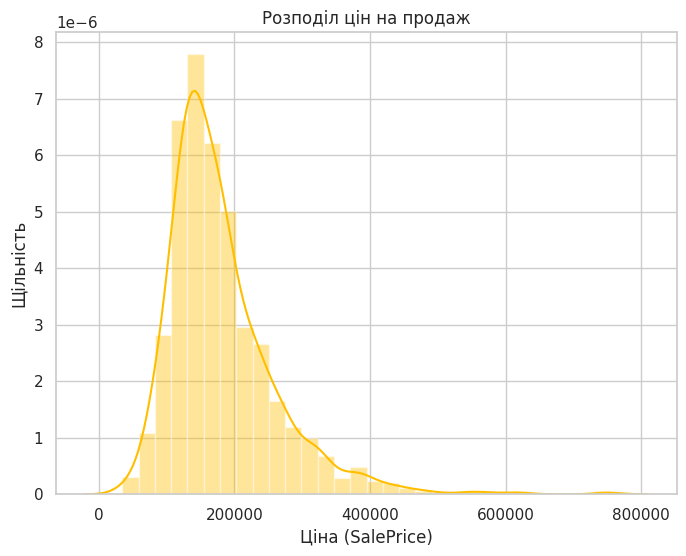

In [5]:

# Побудова графіку щільності для колонки 'SalePrice' в DataFrame 'df'
sns.set(style="whitegrid")  # Налаштування стилю графіку (за бажанням)

plt.figure(figsize=(8, 6))  # Задаємо розмір графіку (за бажанням)
sns.distplot(df_train['SalePrice'], kde=True, bins=30, color='#FFBF00')  # Побудова графіку

# Налаштування заголовка та міток на графіку (за бажанням)
plt.title('Розподіл цін на продаж')
plt.xlabel('Ціна (SalePrice)')
plt.ylabel('Щільність')

# Відображення графіку
#plt.show()


3.2. Виведіть асиметрію та ексцес (на англ. - skewness and kurtosis) для `SalePrice` (не візуально, відповідь у числовому форматі).

In [8]:

# Обчислити асиметрію (skewness) для 'SalePrice'
sale_price_skew = skew(df_train['SalePrice'])

# Обчислити ексцес (kurtosis) для 'SalePrice'
sale_price_kurtosis = kurtosis(df_train['SalePrice'])

# Вивести результати
print("Асиметрія (Skewness) для 'SalePrice':", sale_price_skew)
print("Ексцес (Kurtosis) для 'SalePrice':", sale_price_kurtosis)


Асиметрія (Skewness) для 'SalePrice': 1.880940746034036
Ексцес (Kurtosis) для 'SalePrice': 6.509812011089439


Бачимо, що змінну зміщено. Те, наскільки вона схожа на нормальний розподіл, ми навчимося обчислювати трохи пізніше на курсі.

4. Побудуйте матрицю кореляції, яка міститиме цільову змінну `SalePrice` і усі **числові**. Відобразіть її у вигляді теплової карти.

- Матриця може бути трикутною (без верхньої правої частини, яка симетрична нижній лівій), повною або лише один рядок, що містить кореляції зі змінною `SalePrice`. Але обов'язково має бути зафарбована залежно від значення клітини матриці.  


- Числові змінні необхідно вибрати, використовуючи функцію `pandas`, передавати списком буде вважатися неправильним виконанням.  
Якщо на вашу думку деякі змінні необхідно перетворити на числові перед побудовою потрібної в цьому завданні візуалізації – перетворіть, але якщо не перетворите це не буде помилкою.
Суть завдання – виділити функцією лише числові змінні та відобразити матрицю кореляції візуально. Не обов'язково підписувати значення у клітинах матриці кореляції. Нам важливо зрозуміти, з якими ознаками таргет корелює добре, а з якими – ні.


- Фінальний графік має бути зручним для сприйняття, читаним, таким, який ви додали б у презентацію для менеджменту.

Text(0.5, 1.0, 'Матриця кореляції')

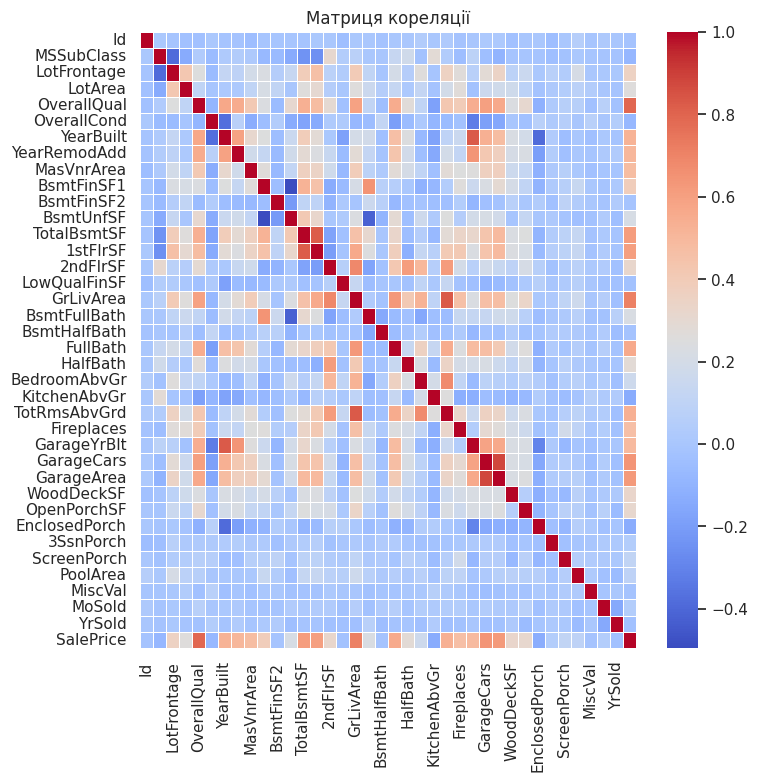

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Вибір числових змінних (цільова змінна "SalePrice" і всі числові)
df_num_feat = df_train.select_dtypes(include=[float, int])

# Побудова матриці кореляції
correlation_matrix = numeric_features.corr()

# Відображення матриці кореляції у вигляді теплової карти
plt.figure(figsize=(8, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5) # sieht überfüllt (kaka) aus!
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Матриця кореляції')
#plt.show()


Які висновки можна зробити із побудованої матриці кореляцій? Які числові ознаки потенційно сильно впливають на цільову змінну, які – ні?

*ваші думки тут* цільову змінну "SalePrice"  influence: "Lotfrontage', Lotarea, OverallQual (sehr) ...    

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd   ...



4.1. Знайдіть топ 10 змінних (не включаючи саму `SalePrice`), з якими `SalePrice` має найбільшу позитивну кореляцію. Виведіть ці змінні та кореляцію з ними.

In [18]:
# ваш код тут# Berechnung der Korrelationen zwischen allen numerischen Merkmalen und 'SalePrice'
correlations = df_num_feat.corr()['SalePrice'].sort_values(ascending=False)

# Top 10 Variablen mit der höchsten positiven Korrelation (exklusive 'SalePrice')
top_10_positive_correlations = correlations[1:11]

# Ausgabe der Ergebnisse
print("Top 10 Variablen mit höchster positiver Korrelation zu 'SalePrice':")
print(top_10_positive_correlations)


Top 10 Variablen mit höchster positiver Korrelation zu 'SalePrice':
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


4.2. Побудуйте теплову карту кореляцій тільки серед змінних `SalePrice` та топ 10, що корелюють із нею. На тепловій карті виведіть числом із двома цифрами після коми міру кореляції між кожною парою змінних.

Text(0.5, 1.0, 'Теплова карта кореляції між SalePrice та топ 10 змінними')

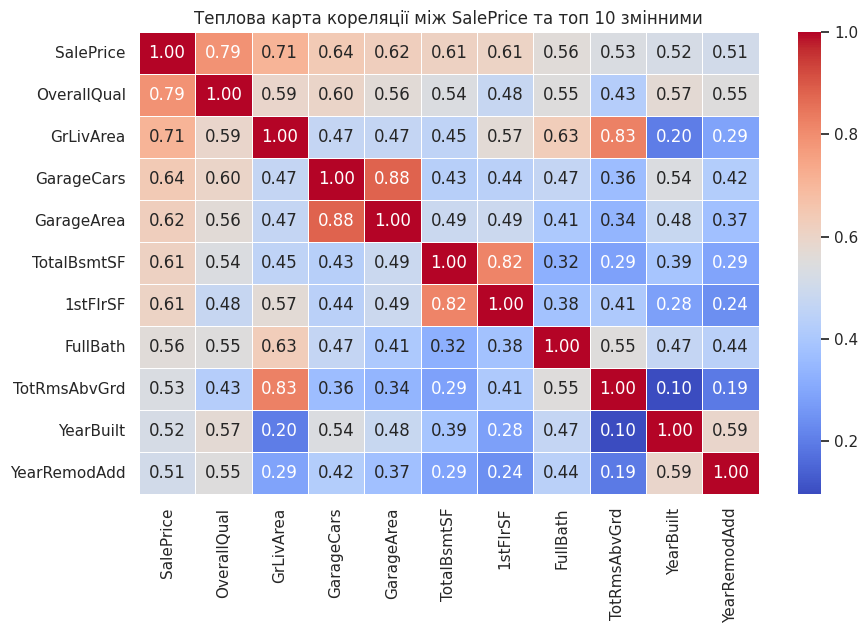

In [20]:

# Вибір змінних для кореляції (SalePrice та топ 10 кореляційних змінних)
selected_features = ['SalePrice'] + top_10_positive_correlations.index.tolist()

# Створення нового DataFrame з обраними змінними
selected_df = df_num_feat[selected_features]

# Розрахунок матриці кореляцій
correlation_matrix = selected_df.corr()

# Побудова теплової карти з числовими значеннями кореляції
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Теплова карта кореляції між SalePrice та топ 10 змінними')
#plt.show()


4.3. Проаналізуйте отриманий результат. На вашу думку, чи логічно, що саме ці ознаки найбільше корелюють з цільовою змінною? Обґрунтуйте свою відповідь.

In [ ]:
# ваша відповідь тут

5. Побудуйте трикутний pairplot для `SalePrice` і топ 10 ознак у наборі даних, що корелюють з нею.
Додайте лінії тренду до даних (параметр `kind`). По діагоналі виведіть kernel density estimation (kde) змінних.

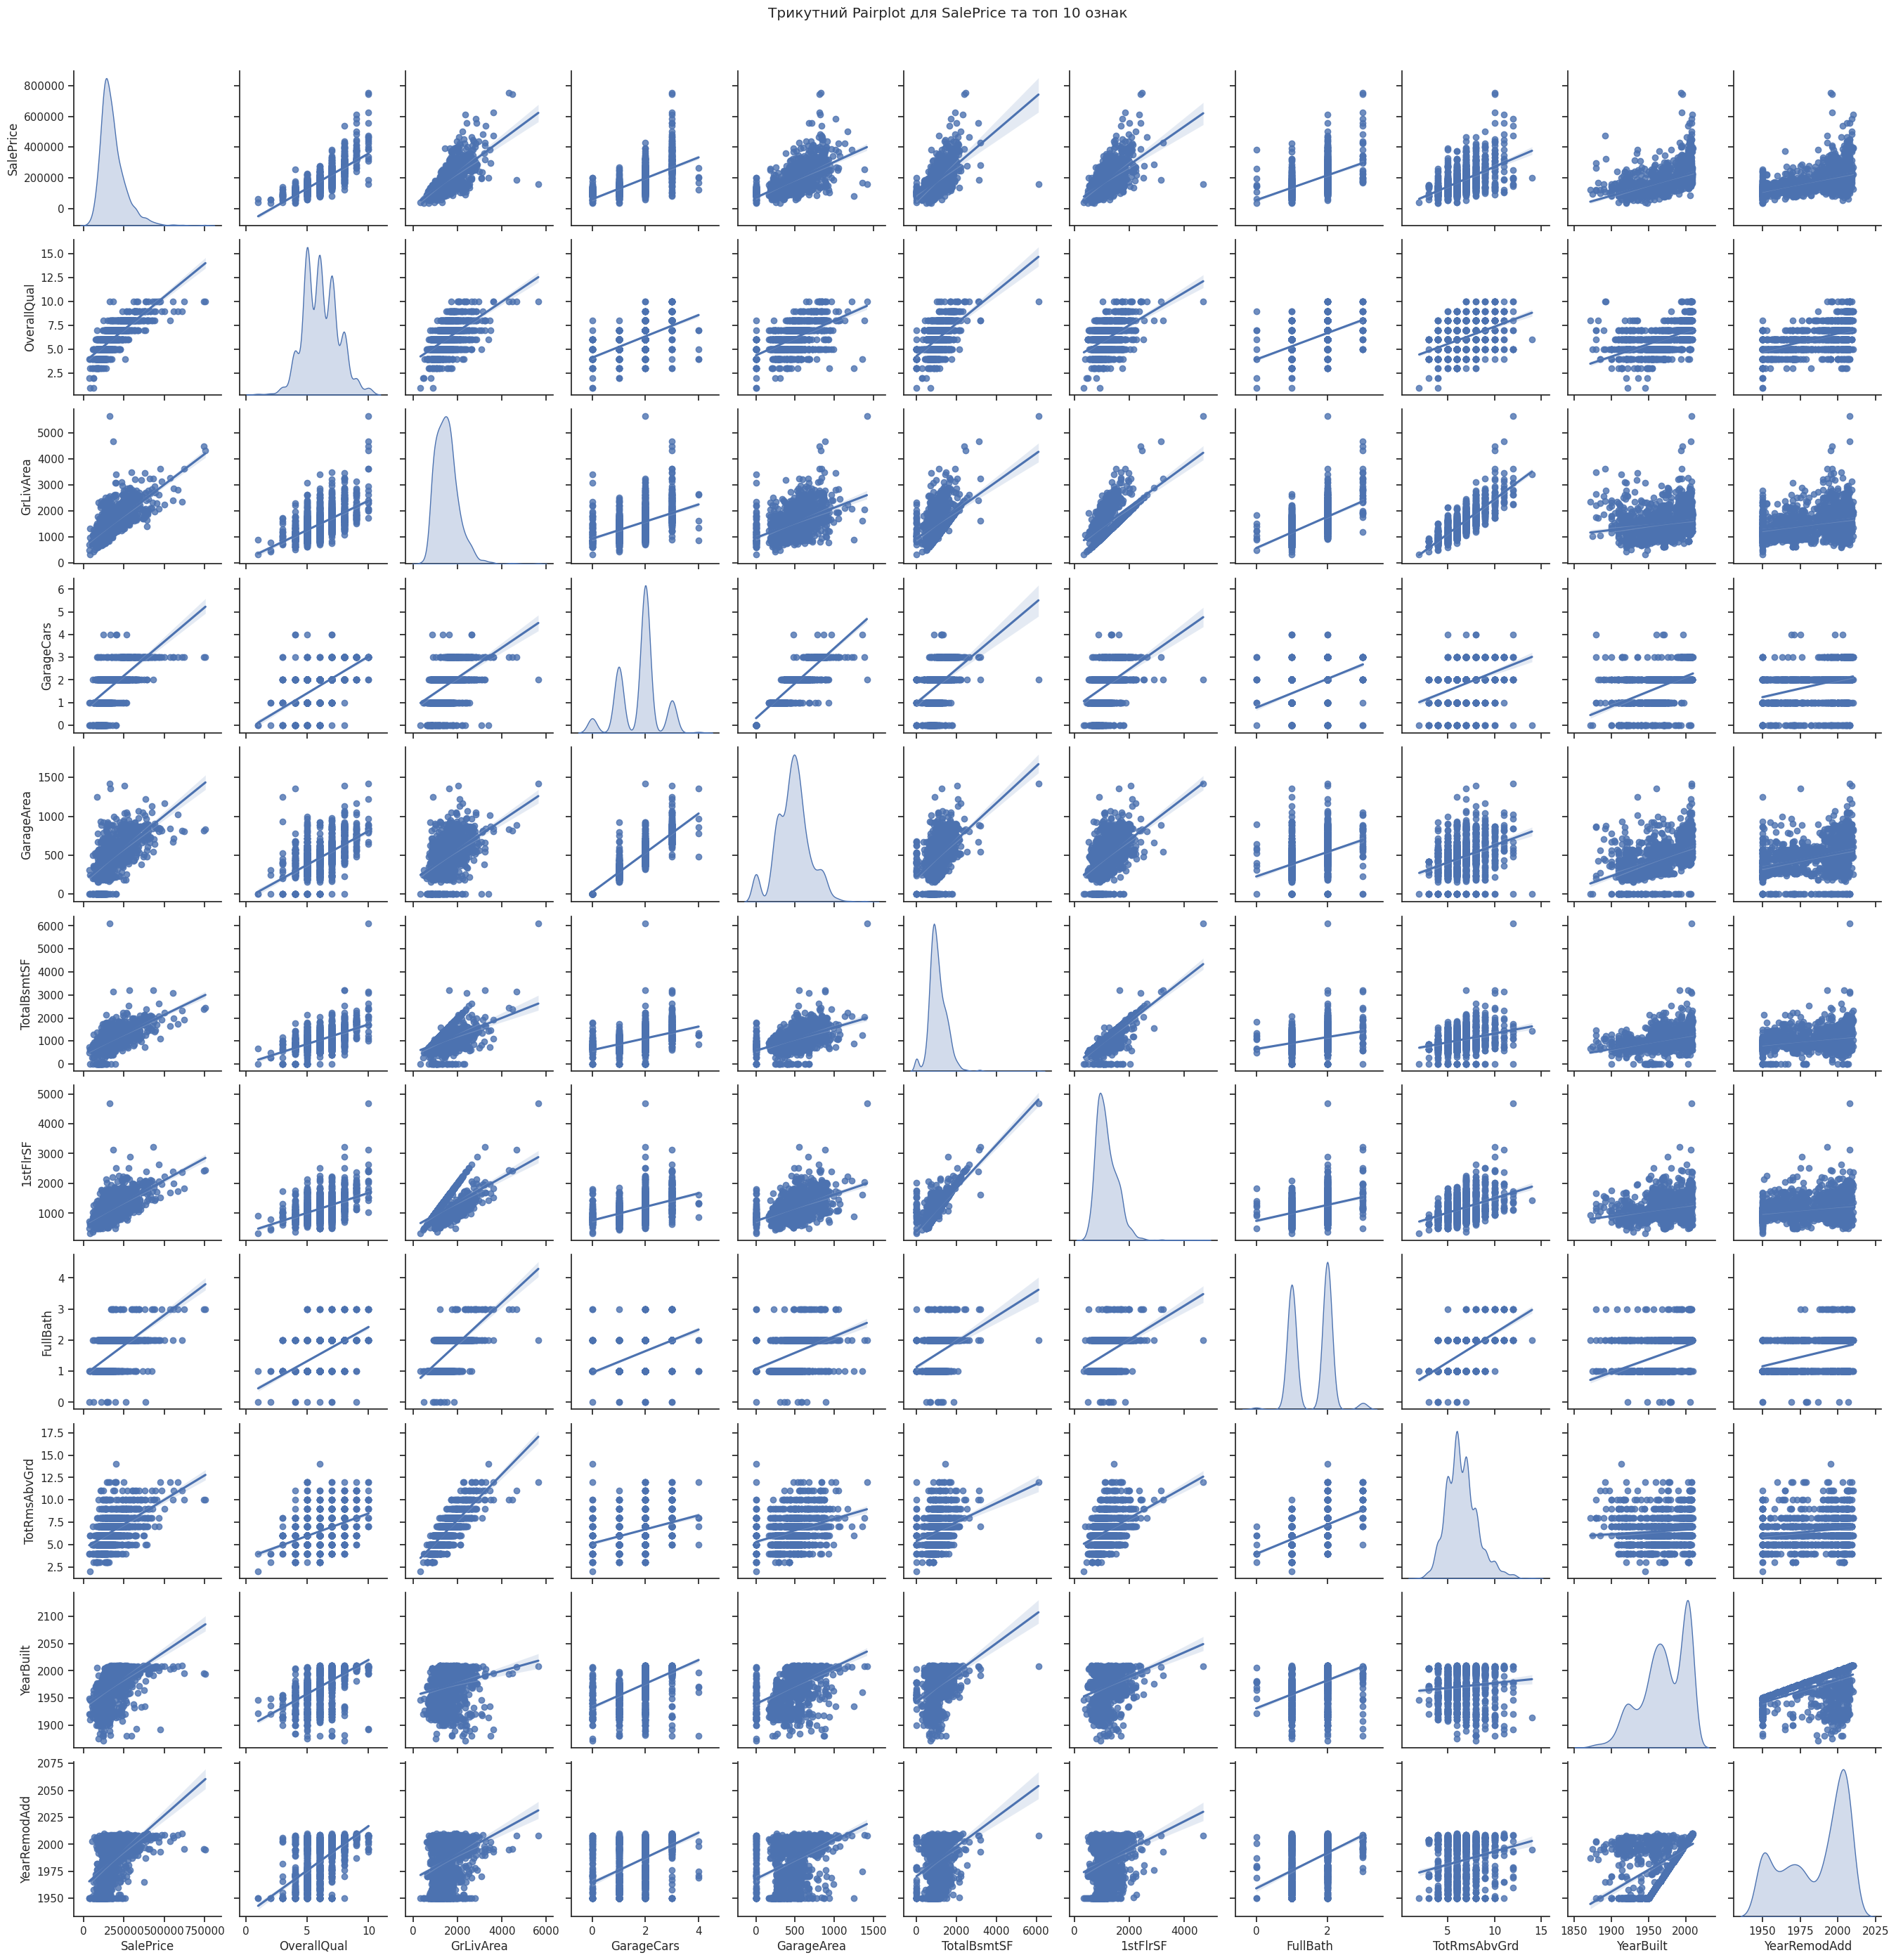

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вибір змінних для pairplot (SalePrice та топ 10 кореляційних змінних)
selected_features = ['SalePrice'] + top_10_positive_correlations.index.tolist()

# Створення нового DataFrame з обраними змінними
selected_df = df_num_feat[selected_features]

# Побудова трикутного pairplot
sns.set(style="ticks")
pairplot = sns.pairplot(selected_df, kind="reg", diag_kind="kde")

# Налаштування заголовка графіку
pairplot.fig.suptitle('Трикутний Pairplot для SalePrice та топ 10 ознак', y=1.02)

# Відображення графіку
plt.show()


Ми можемо бачити точки, які начебто не потрапили до загального кластеру. Їх називають аутлаєрами (с англ. outliers) або викидами. Такими є, наприклад, точки з невисокою `SalePrice` і при цьому високе значення `GrLivArea`, або точка зі значенням `TotalBsmtSF` близько 6000 і при цьому низьким `SalePrice`. Давайте розглянемо, що це за точки.

5.1. Виведіть точки з `GrLivArea` строго більше 4000.

In [37]:
# Фільтрація рядків з GrLivArea більше 4000
filtered_df = df_train[df_train['GrLivArea'] > 4000]

# Виведення результатів
#filtered_df['GrLivArea']

filtered_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,...,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,...,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,...,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,...,1,2008,New,Partial,160000


5.2. Не всі колонки помістилися при виведенні? Встановіть параметр `display.max_columns` рівний 100. І виведіть запитувані дані в п.5.1, ще раз, щоб було зручно аналізувати дані.

In [36]:
# Встановлення значення параметра display.max_columns рівним 100
pd.set_option('display.max_columns', 100) # Macht nicht viel Sinn, da es insgesamt 81 Columns gibt!!!

# Виведення точок з GrLivArea більше 4000
filtered_df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice
523,524,60,130.0,40094,10,...,0,0,10,2007,184750
691,692,60,104.0,21535,10,...,0,0,1,2007,755000
1182,1183,60,160.0,15623,10,...,555,0,7,2007,745000
1298,1299,60,313.0,63887,10,...,480,0,1,2008,160000


5.3. Для даних отриманих у п.5.1 дайте відповідь на питання: чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?

Щоб легше було дати відповідь на це питання, відкиньте колонки, в яких записи для вибраних рядків однакові у всіх рядках (скрізь одне й те число/рядок/дата). Скільки колонок вийшло через відкидання малоінформативних? Виведіть колонки, що залишилися, і дайте відповідь на задане на початку цього пункту питання.

У відповіді наведіть свої гіпотези (мінімум 3) про відмінності з погляду ознак (які ознаки найбільше впливають на різницю в ціні?). Гіпотези відсортуйте за спаданням гіпотетичного впливу (тобто, на першому місці найбільш робоча гіпотеза на Ваш погляд, на останньому - найменш робоча). Мета ранжування: уявіть, що Вам треба визначити топ гіпотез і з'ясувати: чи різниця в ціні випадкова, чи це проблема даних. У вас на це обмежений час, щоб ви перевіряли в першу чергу?

In [ ]:
# ваша відповідь тут

5.4. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Condition1`, по осі ОУ - `SalePrice`.

In [ ]:
# ваш код тут

Для дому з Id=1299 ми могли б обґрунтувати низьку ціну тим, що вона має параметр Condition1=FeedR (точки з цим параметром зазвичай мають нижчу ціну), а ось з Id=524 Condition1 = PosN навряд чи негативно впливає на ціну, швидше навпаки. Схоже, причина низької ціни цих будинків - інша.

5.5. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Neighborhood`, по осі ОУ - `SalePrice`.

Text(0.5, 1.0, 'Діаграма розсіювання між Neighborhood і SalePrice')

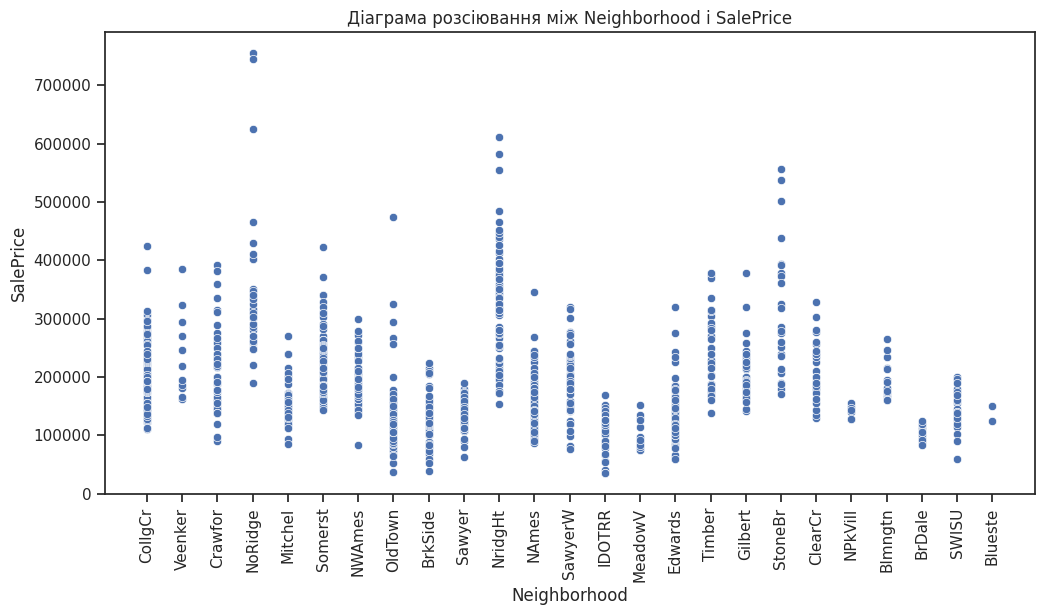

In [40]:

# Побудова діаграми розсіювання
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Neighborhood', y='SalePrice', data=df_train)
plt.xticks(rotation=90)  # Поворот міток по осі X для зручності
plt.title('Діаграма розсіювання між Neighborhood і SalePrice')
#plt.show()


Погляньте на `SalePrice` за різним Neighborhood, чи бачите ви закономірності?  
Виведіть mean, std, min, max, mode значення `SalePrice` для різних значень Neighborhood (оптимально - з використанням функцій `groupby()` та `describe()`), відсортуйте значення за спаданням mean, зробіть градієнтне зафарбовування таблиці. Чи підтверджуються знайдені закономірності з діаграми?

In [50]:
# Встановлення параметрів відображення для pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Групування за Neighborhood і отримання статистичних характеристик для SalePrice
neighborhood_stats = df_train.groupby('Neighborhood')['SalePrice'].describe()

# Сортування за спаданням середнього значення SalePrice
neighborhood_stats = neighborhood_stats.sort_values(by='mean', ascending=False)

# Градієнтне зафарбовування таблиці
#cm = sns.light_palette("green", as_cmap=True)
styled_neighborhood_stats = neighborhood_stats.style.background_gradient()  #(cmap=cm)

# Виведення таблиці
styled_neighborhood_stats

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


## Funktioniert nicht

Схоже будинки  Id=524 та Id=1299 мають neighborhood, у якому ціни будинків низькі. Цим можливе й обґрунтовується ціна. Але це лише гіпотеза.

6. Проаналізуємо пропущені значення

6.1. За допомогою бібліотеки `missingno` виведіть у вигляді bar chart кількість відсутніх значень у колонках датасету. Щоб переглядати було комфортно, виведіть на одній фігурі дві панелі розташовані вертикально (тобто друга під першою), де на першій панелі буде інформація про відсутні значення у перших 40 колонках, а на другій - у всіх інших.

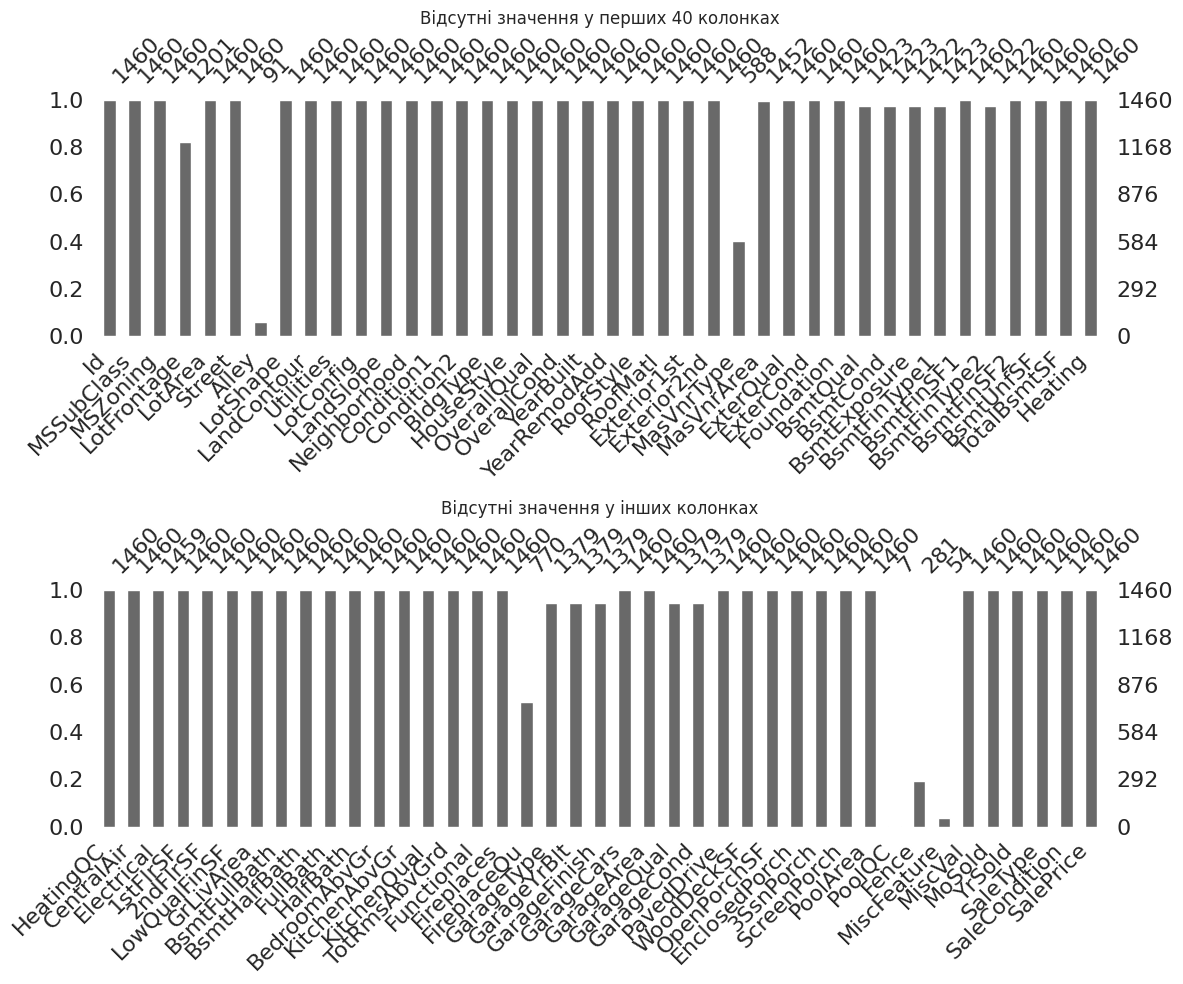

In [57]:

# Розділення колонок на дві групи: перші 40 і решта
first_40_columns = df_train.columns[:40]
remaining_columns = df_train.columns[40:]

# Створення панелей для відсутності значень
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Перша панель: перші 40 колонок
msno.bar(df_train[first_40_columns], ax=axes[0])
axes[0].set_title('Відсутні значення у перших 40 колонках')

# Друга панель: всі інші колонки
msno.bar(df_train[remaining_columns], ax=axes[1])
axes[1].set_title('Відсутні значення у інших колонках')

plt.tight_layout()

plt.show()


6.2 Використовуючи візуалізацію, визначте, в яких колонках немає більше половини записів. Відповідь – текстом назви колонок.

Antwort:  PoolQC, Fence, MiscFeature,  Alley,  MasVnrType'(?) so nicht klar 

6.2.1. Проведемо подібний аналіз не візуально, а аналітично, щоб ви могли вибрати те, що вам зручніше.
Порахуйте, скільки значень відсутні в кожній колонці датафрейму `df_train` (використовуйте функцію `isna()` і google за необхідності).  
Запишіть результат у змінну `count_na`.


In [59]:
# Определение колонок с более чем половиной отсутствующих значений
columns_with_missing_data = df_train.columns[df_train.isnull().mean() > 0.5]

# Вывод названий колонок
print(columns_with_missing_data)


Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


6.2.2. Користуючись змінною `count_na`, виведіть колонки, у яких відсоток відсутніх значень строго більше 50.
Відповіддю має бути структура `pd.Series` з індексом - назва колонки та значеннями - відсоток відсутніх значень у цій колонці.

In [61]:
# Розраховуємо відсоток відсутніх значень для кожної колонки
percent_missing = (df_train.isnull().mean() * 100)

# Вибираємо тільки ті колонки, де відсоток відсутніх значень більше 50%
count_na = percent_missing[percent_missing > 50]

# Виводимо структуру pd.Series
count_na


Alley         93.77
MasVnrType    59.73
PoolQC        99.52
Fence         80.75
MiscFeature   96.30
dtype: float64

Порівняйте отримані результати з тими, що ви зазначили в п.6.1, вони повинні збігатися.

Yapp!

6.3. Виведіть матричне відображення відсутніх значень за допомогою бібліотеки missingno. Знайдіть, яка максимальна кількість заповнених даних в одному рядку і яка мінімальна. Кількість заповнених даних на одному рядку обмежена зверху кількістю колонок.


Увага: щоб відповісти на запитання коректно користуючись візуалізацією, вам необхідно вивести тут на **одній** діаграмі **всі** колонки відразу (вони помістяться).

Максимальна кількість заповнених даних в одному рядку: 80
Мінімальна кількість заповнених даних в одному рядку: 65


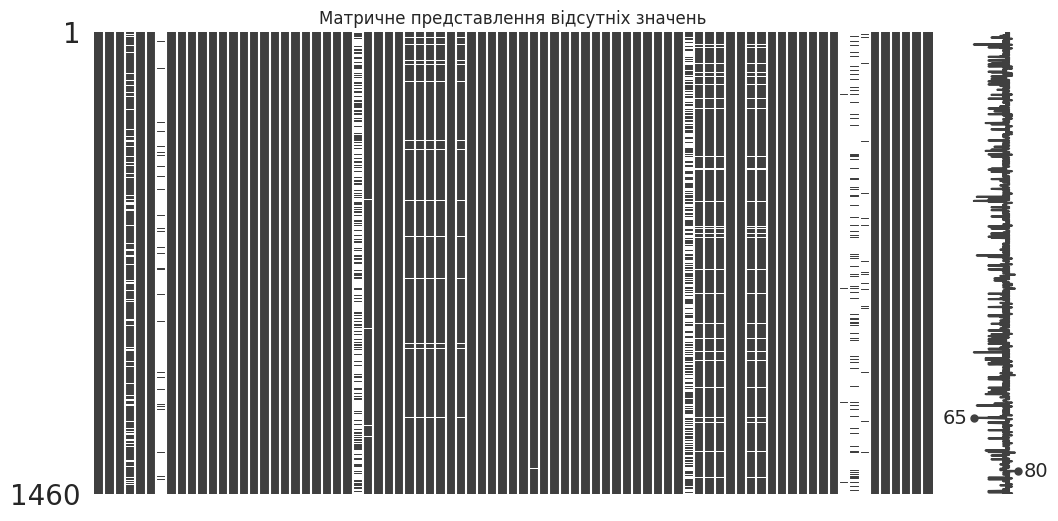

In [63]:

# Виведення матричного представлення відсутніх значень
msno.matrix(df_train, figsize=(12, 6))
plt.title('Матричне представлення відсутніх значень')
plt.show()


Цей код виводить матричне представлення відсутніх значень 

In [65]:
# Знаходження максимальної та мінімальної кількості заповнених даних в одному рядку...  визначає максимальну та мінімальну кількість заповнених даних в одному рядку за допомогою методу count() 

max_filled = df_train.count(axis=1).max()
min_filled = df_train.count(axis=1).min()

print(f'Максимальна кількість заповнених даних в одному рядку: {max_filled}')
print(f'Мінімальна кількість заповнених даних в одному рядку: {min_filled}')

Максимальна кількість заповнених даних в одному рядку: 80
Мінімальна кількість заповнених даних в одному рядку: 65


6.4. Виведіть теплову картку відсутніх значень за допомогою бібліотеки `missingno`.  
Якщо немає змінної `GarageType`, у яких ще змінних теж будуть відсутні значення?

Змінні, які мають відсутні значення, коли відсутня змінна GarageType:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


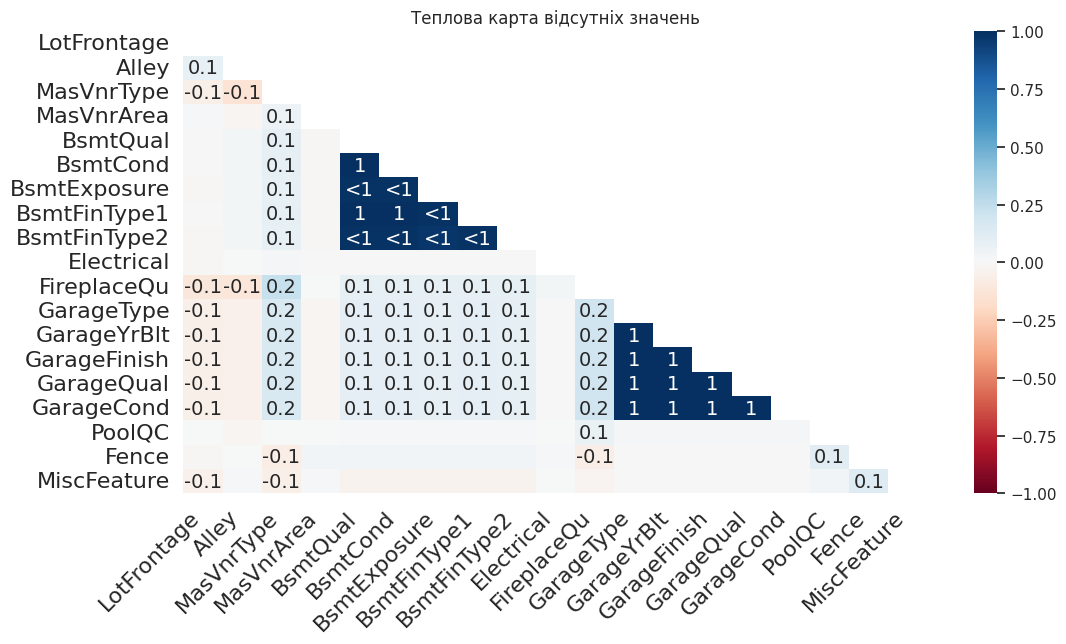

In [74]:
import missingno as msno
import matplotlib.pyplot as plt

# Виведення теплової карти відсутніх значень
msno.heatmap(df_train, figsize=(12, 6))
plt.title('Теплова карта відсутніх значень')

plt.show()


In [75]:
# Створення нового DataFrame, де всі значення будуть True, якщо GarageType пропущено
missing_garage_type = df_train['GarageType'].isna()

# Пошук інших змінних, які також пропущені там, де GarageType пропущено
variables_with_missing_values = df_train.columns[df_train[missing_garage_type].isna().any()]

print(f'Змінні, які мають відсутні значення, коли відсутня змінна GarageType:')
print(variables_with_missing_values)


Змінні, які мають відсутні значення, коли відсутня змінна GarageType:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')
